In [3]:
# pip install --upgrade Pillow

In [4]:
# # # TEAHCER'S DATASET
# # Import the necessary libraries
# import cv2
# import numpy as np
# import random
# import string
# from PIL import Image, ImageDraw, ImageFont
# import os

# text = string.ascii_letters + string.digits
# def generate(character,font_size,output_path,font_path,position,angle,number):
#     os.makedirs(output_path, exist_ok=True)  # Ensure output directory exists
#     #create a image 
#     image = Image.new('RGBA', (128, 128), 0)
#     draw = ImageDraw.Draw(image)
#     # Load the custom font
#     try:
#         font = ImageFont.truetype(font_path, font_size)
#     except IOError:
#         print("Font not found. Please check the font path.")
#         return

#     # Draw the text
#     draw.text(position, character, fill='white', font=font)
#     # Convert PIL image to OpenCV format (numpy array)
#     image_np = np.array(image)
#     image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
#     # Define rotation parameters
#     center = (25, 25)  # Center of rotation
#     scale = 1.0
#     # Get the rotation matrix and apply rotation
#     rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
#     rotated_image = cv2.warpAffine(image_np, rotation_matrix, (128, 128))
#     output_filename = f"{output_path}/{character}-{number}.png"
#     cv2.imwrite(output_filename, rotated_image)
#     print(f"Image saved at {output_filename}")



# def main():
#     text = string.ascii_letters + string.digits
#     output_paths = ["Oswald","Algerian"]
#     font_paths = ["/kaggle/input/inputlobsterfont/Lobster-Regular.ttf","/kaggle/input/fontstttf/Algerian Regular.ttf"]
#     for character in text:
#         nbr_images = random.randint(100,500)
#         for j in range(nbr_images):
#             font_size = random.randint(20,40)
#             position = (random.randint(20, 100), random.randint(20, 100))
#             angle = random.randint(0, 35)
#             number = random.randint(1, 1000000)
#             for i in range(2):
#                 generate(character, font_size, output_paths[i], font_paths[i],position, angle, number)

# main()

# **One font Dataset Generation**

In [5]:
import os
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
import random

# Configuration
output_dir = "dataset/"  # Path to save generated images
characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"  # Characters to generate
image_size = 28  # Final size for each character image
font_path = "/kaggle/input/inputlobsterfont/Lobster-Regular.ttf"  # Path to the font
text_colors = ["black"]  # Use black for text
background_color = "white"  # Background color
rotations = [0, 90, 180, 270]  # Rotation angles in degrees
images_per_character = 100  # Number of images to generate per character
padding = 10  # Padding around text to avoid clipping

# Ensure font file exists
if not os.path.isfile(font_path):
    raise FileNotFoundError(f"Font file not found at {font_path}")

# Load font
try:
    font_size = image_size + padding  # Use larger font size for clarity
    font = ImageFont.truetype(font_path, font_size)
except Exception as e:
    raise RuntimeError(f"Failed to load font: {e}")

# Generate character images
def generate_character_images():
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for char in characters:
        # Create subdirectory for the character
        char_dir = os.path.join(output_dir, char)
        os.makedirs(char_dir, exist_ok=True)

        for i in range(images_per_character):
            # Create a blank image with padding
            img_size_with_padding = image_size + padding * 2
            img = Image.new("RGB", (img_size_with_padding, img_size_with_padding), background_color)
            draw = ImageDraw.Draw(img)

            # Calculate text position to center it
            text_width, text_height = draw.textsize(char, font=font)
            position = ((img_size_with_padding - text_width) / 2, (img_size_with_padding - text_height) / 2)

            # Draw the character
            draw.text(position, char, fill=text_colors[0], font=font)

            # Apply random rotation
            angle = random.choice(rotations)
            rotated_img = img.rotate(angle, expand=True)

            # Crop and resize to 28x28
            cropped_img = rotated_img.crop(rotated_img.getbbox())  # Crop to content
            resized_img = cropped_img.resize((image_size, image_size))

            # Enhance contrast and sharpness
            enhancer = ImageEnhance.Contrast(resized_img)
            enhanced_img = enhancer.enhance(2.0)  # Increase contrast

            # Convert to grayscale (28x28x1)
            grayscale_img = enhanced_img.convert("L")

            # Save the image
            filename = f"{char}_{i}.png"
            grayscale_img.save(os.path.join(char_dir, filename))

    print("Dataset generation complete!")

# Generate images
generate_character_images()


Dataset generation complete!


# **Delete a folder**

In [6]:
# import shutil

# # Path to the folder you want to delete
# folder_path = '/kaggle/working/dataset'

# # Delete the folder and its contents
# try:
#     shutil.rmtree(folder_path)
#     print(f"Folder '{folder_path}' deleted successfully.")
# except FileNotFoundError:
#     print(f"Folder '{folder_path}' not found.")
# except Exception as e:
#     print(f"Error deleting folder '{folder_path}': {e}")


# **Create zip file to download**

In [7]:
# import shutil

# # Specify the path to your folder
# folder_path = '/kaggle/working/Algerian'
# output_zip = '/kaggle/working/dataset'

# # Create a zip file of the folder
# shutil.make_archive(output_zip.replace('.zip', ''), 'zip', folder_path)

# **Visualize dataset**

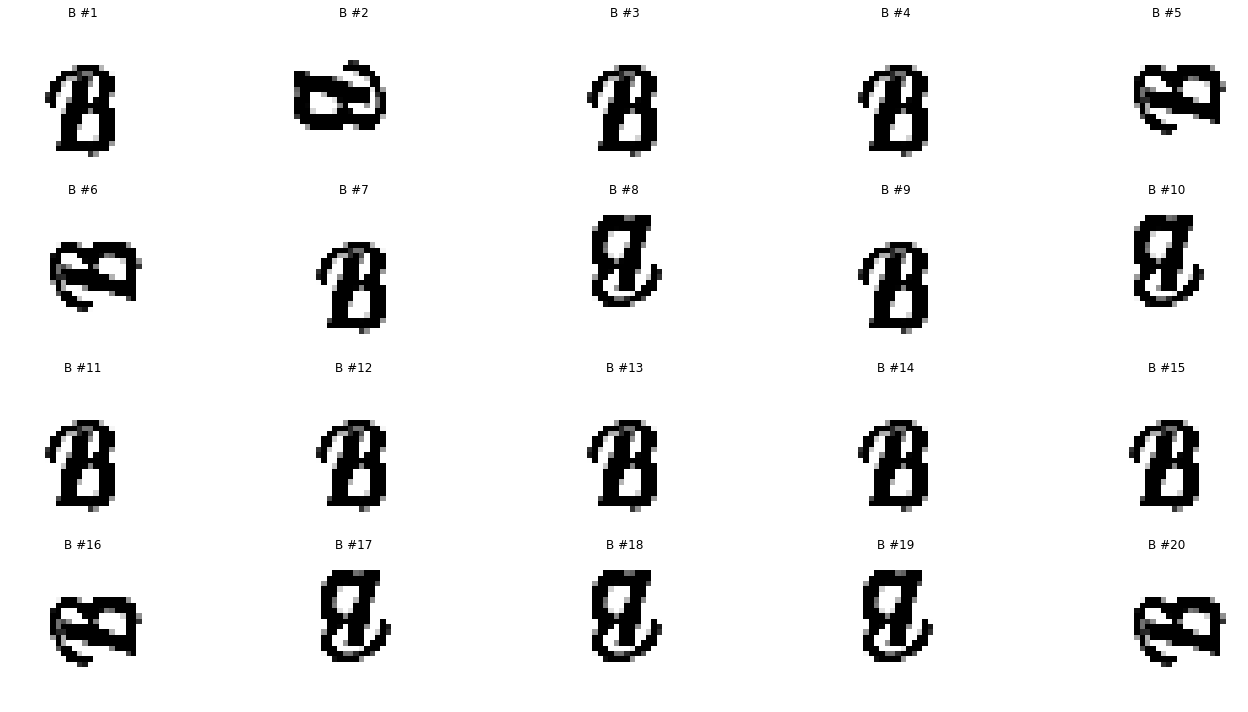

In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Configuration
OUTPUT_DIR = "/kaggle/working/dataset"  # Path to your generated images
CHARACTER = "B"  # Choose a character to visualize
NUM_IMAGES = 20  # Number of images to display

# Get the path of the character folder
char_folder = os.path.join(OUTPUT_DIR, CHARACTER)
if not os.path.exists(char_folder):
    print(f"Character folder {char_folder} not found.")
    exit()

# List the image files in the folder
image_files = sorted(os.listdir(char_folder))[:NUM_IMAGES]  # Sort to ensure consistency

# Determine grid size for plotting
num_cols = 5  # Number of columns
num_rows = (NUM_IMAGES + num_cols - 1) // num_cols  # Calculate rows based on total images

# Plot the images
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
for i, image_file in enumerate(image_files):
    img_path = os.path.join(char_folder, image_file)
    img = Image.open(img_path)

    # Add the image to the plot
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title(f"{CHARACTER} #{i + 1}")

plt.tight_layout()
plt.show()


# **Function to devide dataset into test and train**

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

def load_real_samples(folder_path, img_size=(28,28)):
    """
    Load real samples of characters/numbers for training a GAN.
    Images are organized in subdirectories by class.

    Args:
        folder_path (str): Path to the dataset folder.
                          Each subdirectory represents a class.
        img_size (tuple): Target size for resizing images (width, height).

    Returns:
        tuple: A tuple (X, y) where X is the image data array and y is the corresponding labels.
    """
    dataX, datay = [], []  # Lists to store image data and labels
    class_labels = sorted(os.listdir(folder_path))  # Sorted list of class labels (folder names)

    for idx, class_label in enumerate(class_labels):
        class_folder = os.path.join(folder_path, class_label)  # Path to each class folder
        if os.path.isdir(class_folder):  # Ensure it is a directory
            for file_name in os.listdir(class_folder):
                # Only process valid image files
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_folder, file_name)
                    # Load image and resize to target size
                    img = load_img(img_path, target_size=img_size, color_mode='grayscale')
                    img_array = img_to_array(img)  # Convert image to NumPy array
                    dataX.append(img_array)
                    datay.append(idx)  # Label as the index of the class

    # Convert lists to NumPy arrays
    X = np.array(dataX, dtype='float32')
    y = np.array(datay)

    # Rescale pixel values from [0, 255] to [-1, 1] (assuming GAN with tanh activation)
    X = (X - 127.5) / 127.5

    # Return image data and labels
    return (X, y),(X, y)

# **Define generator, descriminator and cGAN**

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
# Define a Generator
def define_generator(latent_dim):
    # In a conditional GAN, the generator takes both:
    # Latent vector (z): Random noise input.
    # Label (label): Represents the class or category (e.g., digits 0-9 or letters A-Z).
                                                 
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(128*7*7, activation='relu', input_dim=latent_dim)) # dense
  model.add(tf.keras.layers.Reshape((7,7,128))) # reshape vector into a 3D tensor This tensor, a small "image" with 128 channels and a spatial size of 7x7
  model.add(tf.keras.layers.UpSampling2D()) # Doubles the spatial dimensions of the tensor from (7, 7, 128) to (14, 14, 128).
                                            # No learnable parameters; simply an interpolation operation.
  model.add(tf.keras.layers.Conv2D(128,3,padding='same',activation='relu')) # First Convolutional Layer
  model.add(tf.keras.layers.BatchNormalization(momentum=0.8)) # Normalizes activations across the batch to stabilize training and improve performance.
                                                              # momentum=0.8 controls how much of the previous batch’s statistics influence the current batch normalization.
  model.add(tf.keras.layers.UpSampling2D()) # upscales the spatial dimensions from (14, 14, 128) to (28, 28, 128).
  model.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu')) # Second Convolutional Layer
  model.add(tf.keras.layers.BatchNormalization(momentum=0.8)) # Again stabilizes training and normalizes activations.
  model.add(tf.keras.layers.Conv2D(1,3,padding='same',activation='tanh')) # Final convolutional layer (28, 28, 1)
  
  # label encoding
  z = tf.keras.layers.Input(shape=(latent_dim,))
  label = tf.keras.layers.Input(shape=(1,),dtype='uint8')
  label_embed = tf.keras.layers.Embedding(62, latent_dim, input_length=1)(label)
    # example Label 5 (an integer) gets mapped to a dense vector of size latent_dim.
    # There are 62 embeddings (assuming 62 classes: 26 letters + 10 digits + special characters).
  label_embed = tf.keras.layers.Flatten()(label_embed) # Flattens the embedded label vector into a 1D vector
  combined = tf.keras.layers.multiply([z, label_embed]) # Multiplies the latent vector z element-wise with the label embedding.
                                # This allows the generator to condition the image generation process on the label.

  img = model(combined) # Passes the combined vector through the generator model to produce an image (img).

  return tf.keras.models.Model([z, label], img)

latent_dim = 100
g_model = define_generator(latent_dim)
g_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       6200        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 100)          0           embedding[0][0]                  
______________________________________________________________________________________________

In [13]:
# create a discriminator network to differentiate between real and fake image
def define_discriminator():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(32,(3,3),2,input_shape=(28,28,2),padding='same'))
  model.add(tf.keras.layers.LeakyReLU(0.2))
  model.add(tf.keras.layers.Dropout(0.25))
    
  model.add(tf.keras.layers.Conv2D(64,(3,3),2,padding='same'))
  model.add(tf.keras.layers.LeakyReLU(0.2))
  model.add(tf.keras.layers.Dropout(0.25))
    
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  img = tf.keras.layers.Input(shape=(28, 28, 1))
  label = tf.keras.layers.Input(shape=(1,))
  label_embed = tf.keras.layers.Embedding(input_dim=62, output_dim=np.prod((28,28)), input_length=1)(label)
  label_embed = tf.keras.layers.Flatten()(label_embed)
  label_embed = tf.keras.layers.Reshape((28, 28, 1))(label_embed)
  concatenated = tf.keras.layers.Concatenate(axis=-1)([label_embed, img])
  prediction = model(concatenated)
  return tf.keras.models.Model([img, label], prediction)
  
d_model = define_discriminator()
d_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 784)       48608       input_4[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           embedding_1[0][0]                
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 28, 28, 1)    0           flatten_2[0][0]                  
____________________________________________________________________________________________

In [14]:
# configures a model for training in TensorFlow/Keras by specifying the loss function, evaluation metrics, and optimizer.
d_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
# the generator is typically not compiled independently because it is trained indirectly through the discriminator 
# When we compile the adversarial model (the combined model where the generator's output is passed into the discriminator), 
# the optimizer and loss are applied to both the generator and the discriminator.

In [15]:
# The generator creates an image from random noise (z).
# The discriminator evaluates this image and assigns a probability (real or fake).
# The adversarial model calculates the loss based on how well the generator "fooled" the discriminator.
# Gradients are backpropagated through both the discriminator and the generator, updating the generator's weights to improve its ability to fool the discriminator.
z = tf.keras.layers.Input(shape=(100,))
label = tf.keras.layers.Input(shape=(1,))
img = g_model([z, label])

d_model.trainable = False
prediction = d_model([img, label])

cgan = tf.keras.models.Model([z, label], prediction)
cgan.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cgan.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 28, 28, 1)    862393      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 1)            1674369     model[1][0]                

# **Train**

In [16]:
# x_trainM, y_trainM, x_test, y_test = load_mnist()
(x_train, y_train), (x_test, y_test) = load_real_samples('/kaggle/working/dataset')
print(x_train.shape)
print(x_test.shape)

(6200, 28, 28, 1)
(6200, 28, 28, 1)


In [17]:
def plot_image(images, labels, rows, cols):
    fig = plt.figure(figsize=(8, 8))
    for i in range(1, rows * cols + 1):
        img = images[i-1]
        ax = fig.add_subplot(rows, cols, i)
        ax.title.set_text(str(labels[i-1]))  # Fix the index issue here
        plt.imshow(img.reshape((28,28)), cmap='gray')
    fig.tight_layout()
    plt.show()

(6200, 28, 28, 1)
Losses(d,g): 0.75620836 [0.18817729, 1.0]


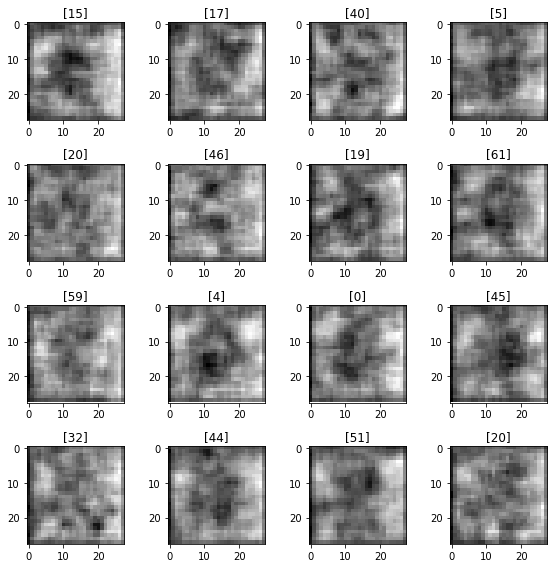

Losses(d,g): 0.001148329 [9.199078, 0.0]


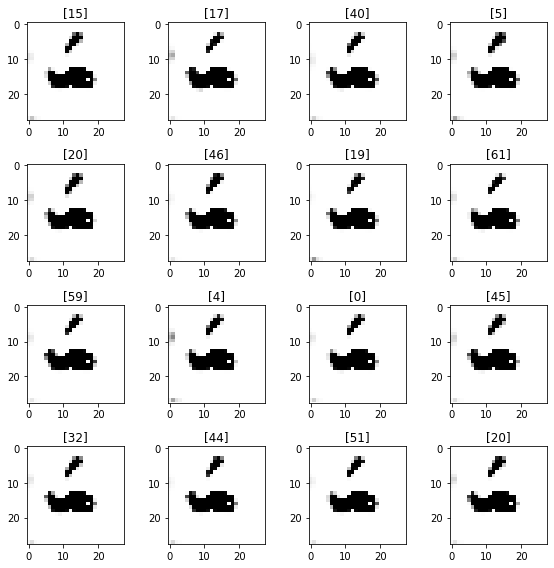

Losses(d,g): 6.662179e-06 [15.737087, 0.0]


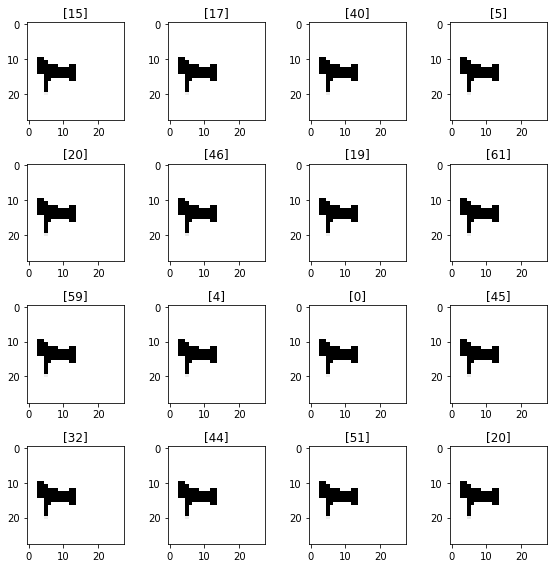

Losses(d,g): 0.0017565127 [10.152864, 0.0]


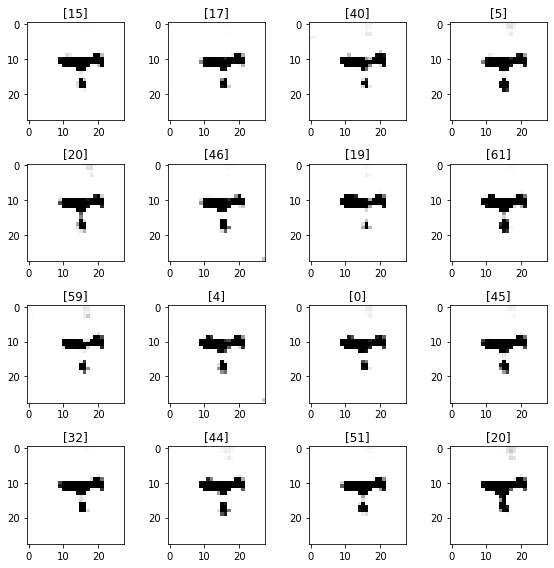

Losses(d,g): 0.0043521686 [12.954097, 0.0]


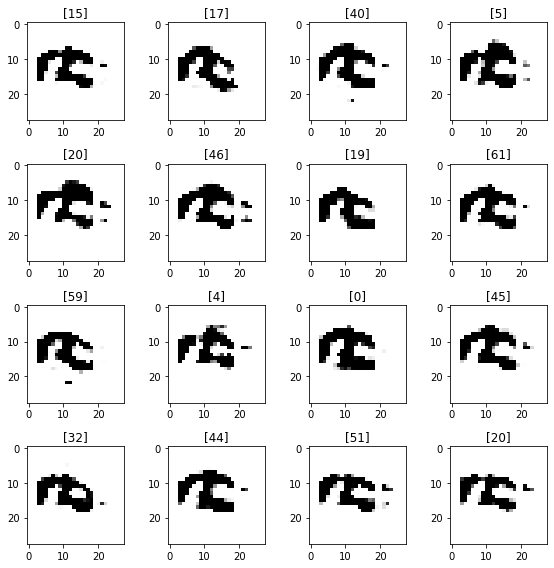

Losses(d,g): 0.0020816782 [11.016568, 0.0]


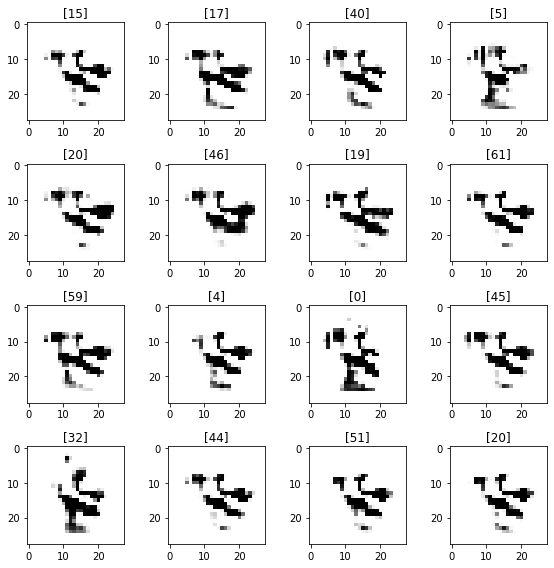

Losses(d,g): 0.000101549806 [15.036663, 0.0]


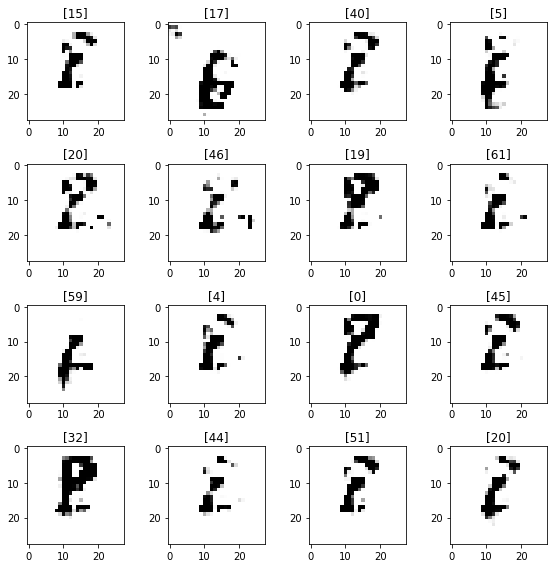

Losses(d,g): 0.00014302516 [18.26233, 0.0]


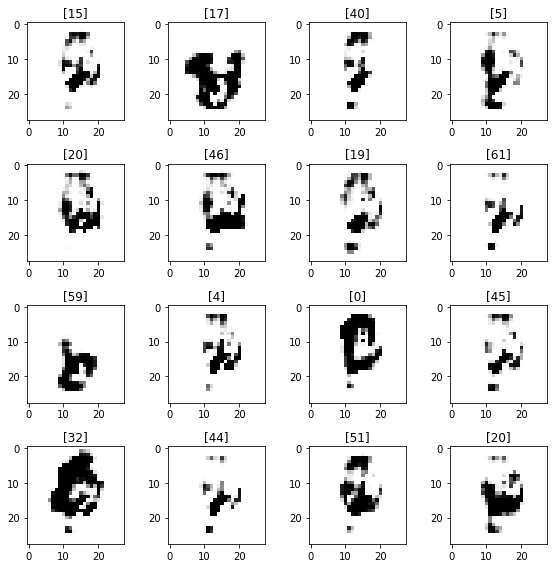

Losses(d,g): 0.00029881243 [9.833102, 0.0]


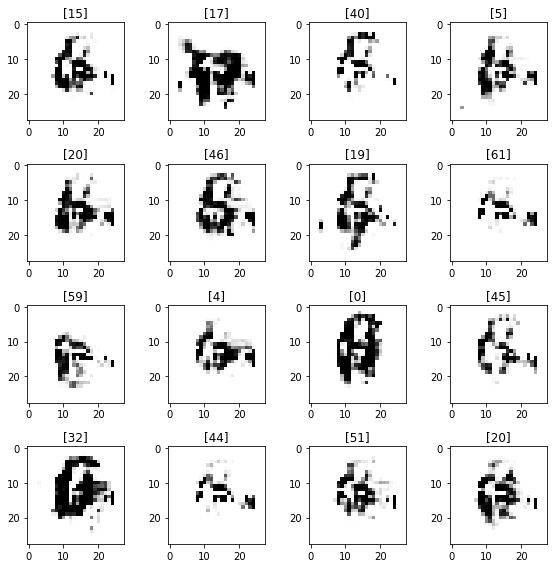

Losses(d,g): 0.0014757895 [11.520797, 0.0]


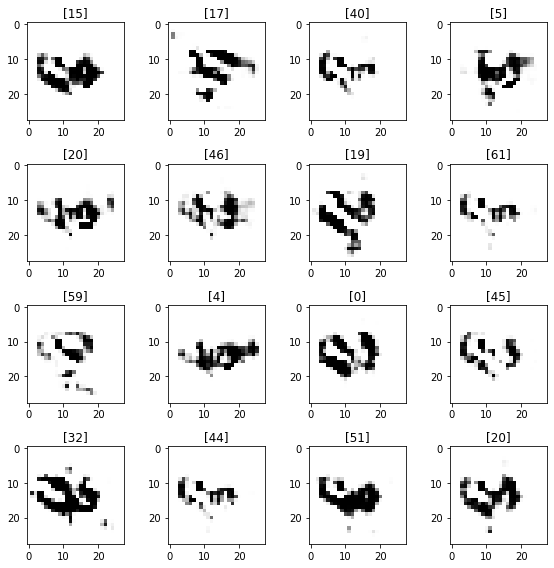

Losses(d,g): 0.00035345543 [12.765729, 0.0]


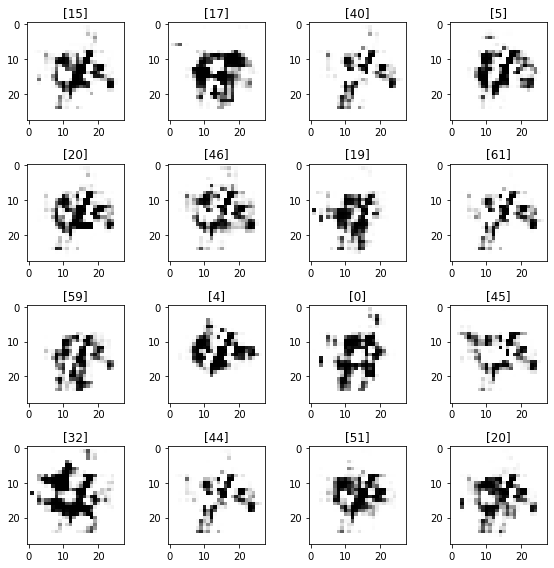

Losses(d,g): 0.003596547 [11.758514, 0.0]


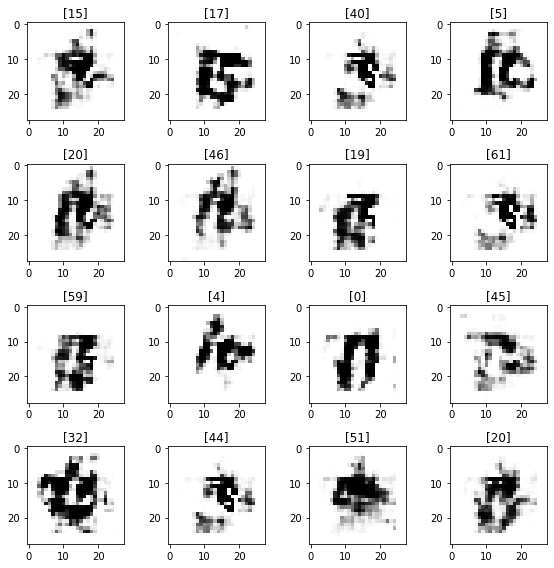

Losses(d,g): 0.0028684472 [8.767742, 0.0]


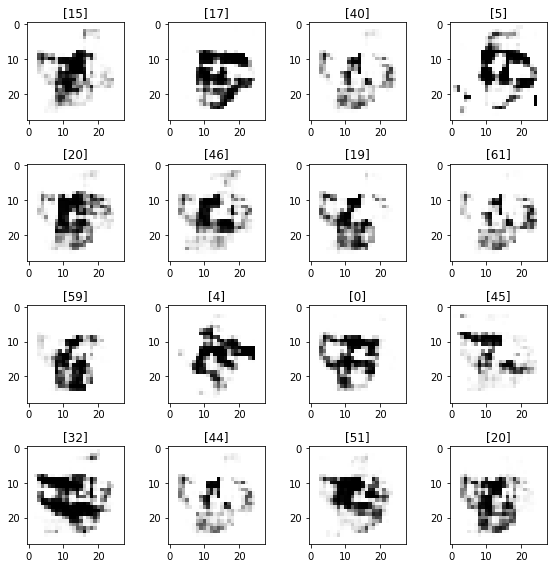

Losses(d,g): 0.008248549 [8.575003, 0.0078125]


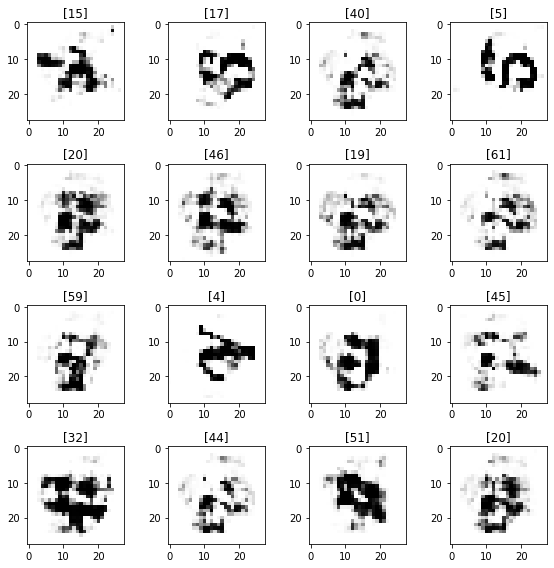

Losses(d,g): 0.030809795 [8.599601, 0.0234375]


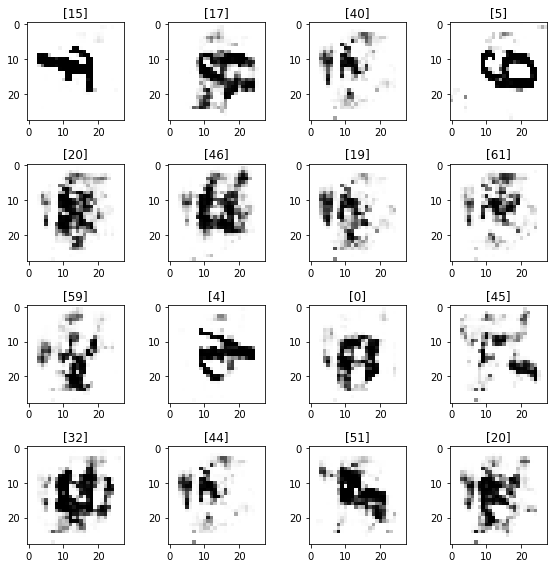

Losses(d,g): 0.091554955 [6.250961, 0.03125]


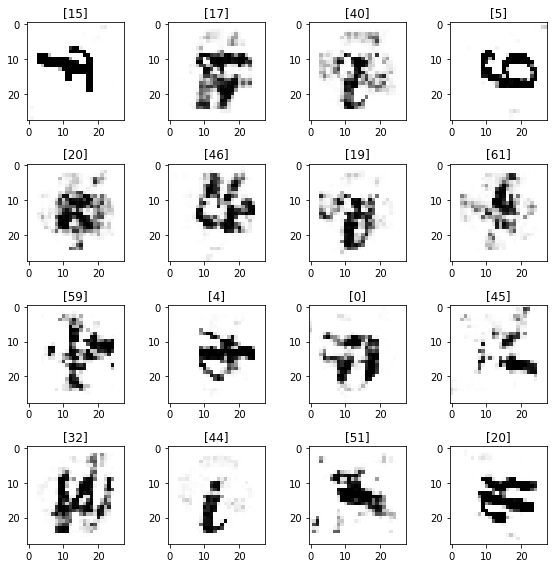

Losses(d,g): 0.24580364 [4.1009645, 0.0234375]


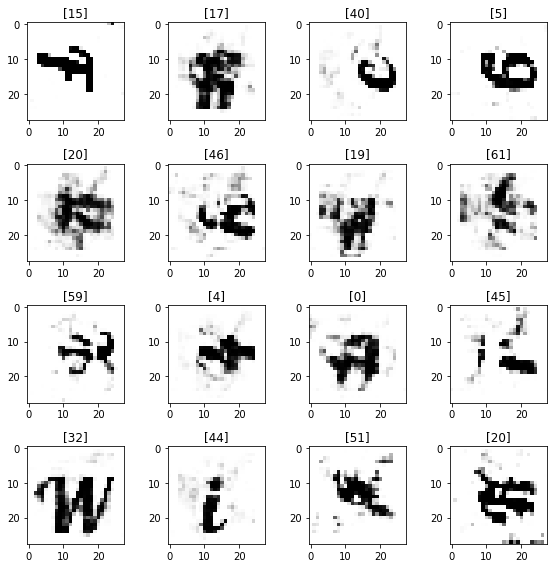

Losses(d,g): 0.23503114 [4.0570765, 0.0703125]


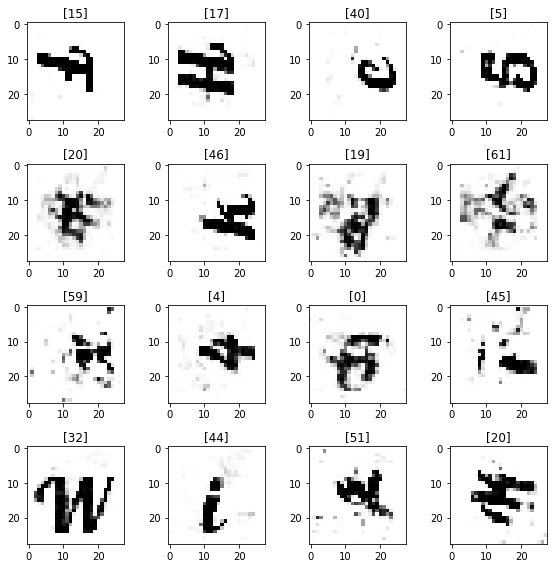

Losses(d,g): 0.17617089 [3.9435716, 0.0703125]


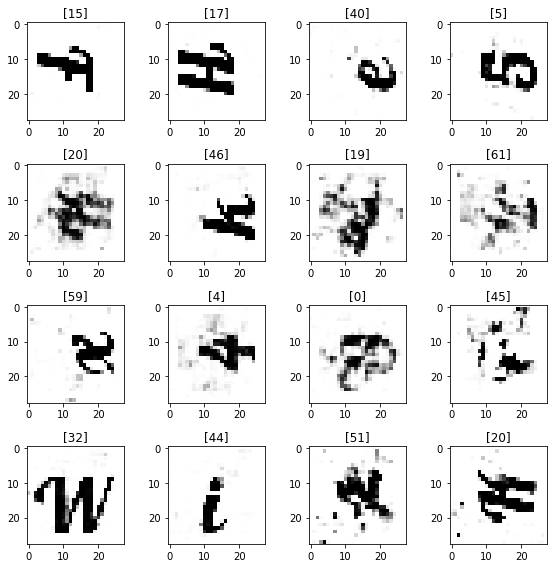

Losses(d,g): 0.2083061 [3.9058704, 0.09375]


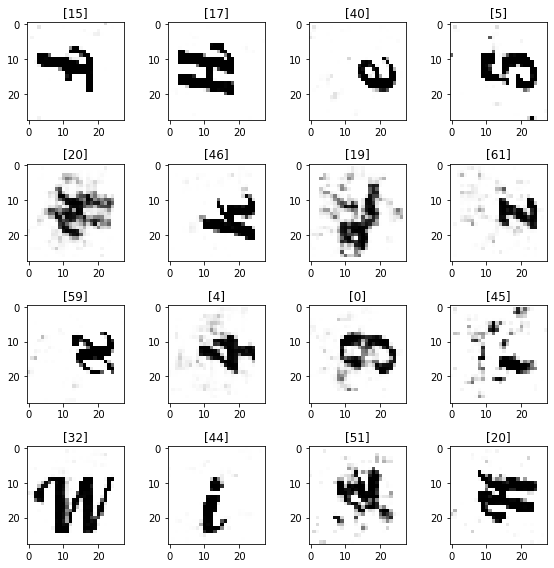

Losses(d,g): 0.22513415 [4.213373, 0.0546875]


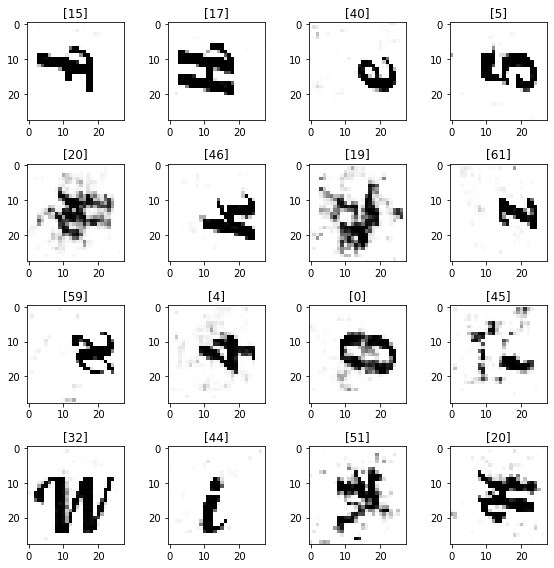

Losses(d,g): 0.19799261 [3.7064214, 0.078125]


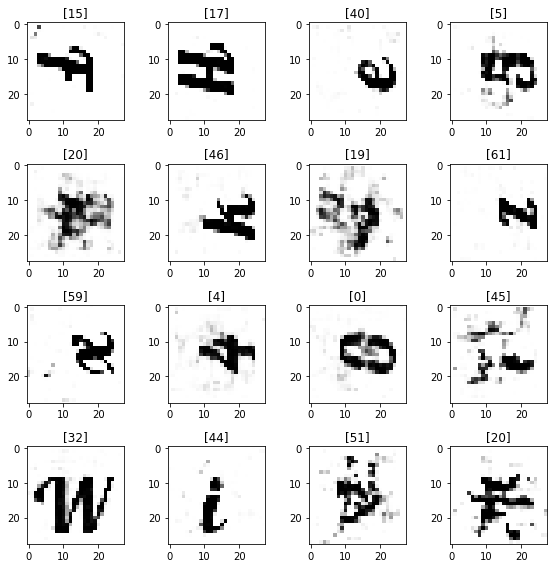

Losses(d,g): 0.21710992 [4.0451093, 0.0546875]


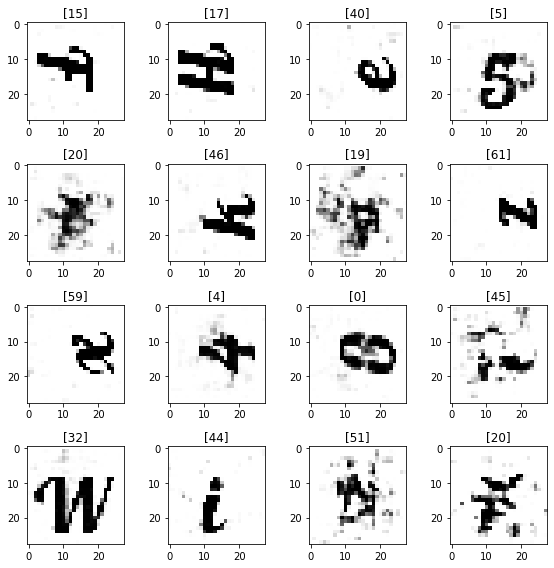

Losses(d,g): 0.1970464 [3.9551349, 0.078125]


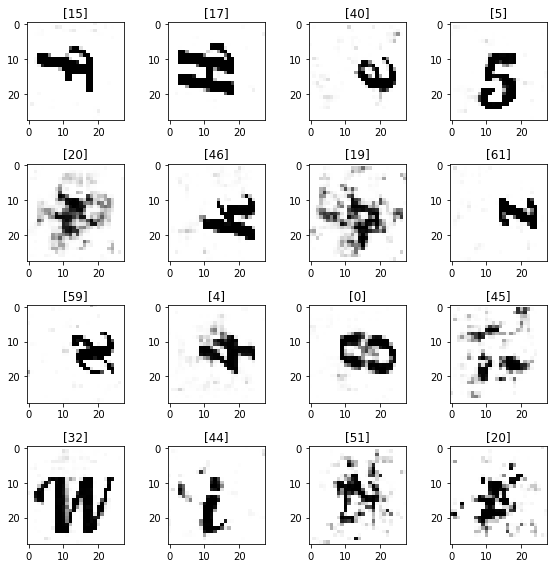

In [ ]:
import os 

epochs = 30000
batch_size = 128
save_interval = 1000

print(x_train.shape)

# to train the discriminator
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

losses = {"G":[], "D":[]}

# Generates noise and random labels to test the generator periodically.
samples_test = np.random.normal(0,1,(16, 100)) # 16 to display
labels_test = np.random.randint(0, 62, 16).reshape((-1, 1))

for epoch in range(epochs):
    # Randomly selects a batch of real images and their labels from the training data
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs, labels = x_train[idx], y_train[idx]

    # Fake Data Generation
    noise = np.random.normal(0,1,(batch_size, 100))
    
    # train generator
    fake_imgs = g_model.predict([noise, labels])
    
    # train discriminator
    d_model.trainable = True
    d_loss_real = d_model.train_on_batch([real_imgs, labels], valid)
    d_loss_fake = d_model.train_on_batch([fake_imgs, labels], fake)
    
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # total loos (on fake& on real)

    # Trains the generator by freezing the discriminator
    d_model.trainable = False
    
    z = np.random.normal(0,1, size=(batch_size, 100))
    labels = np.random.randint(0, 62, batch_size).reshape((-1, 1))

    # train generator
    g_loss = cgan.train_on_batch([z, labels], valid)
    
    losses["G"].append(g_loss)
    losses["D"].append(d_loss)
    
    if epoch % save_interval == 0:
        print("Losses(d,g):", d_loss[0], g_loss)
        results = g_model.predict([samples_test, labels_test])
        plot_image(results, labels_test, 4, 4)

In [ ]:
d_model.save('discriminator.h5')
g_model.save('generator.h5')
cgan.save('cgan.h5')

# **Test generator**

In [ ]:
def generate_image(classes, generator_model):
    noise = np.random.normal(0, 1, size=(len(classes), 100))  # Generate n noise vectors
    labels = np.array(classes).reshape(-1, 1)  # Ensure labels are in the correct shape
    print(noise.shape)
    print(labels.shape)
    print("Start generating ..")
    generated_images = generator_model.predict([noise, labels])
    print("End generating ..")
    return generated_images

# print(f"generated {len(generated_images)} images")
labels = [5, 2, 60, 30]  # Example labels for the generated images
generated_images = generate_image(labels, g_model)

# Plot the generated images in a 2x2 grid
plot_image(generated_images, labels, 2, 2)

In [ ]:
# import cv2
# import numpy as np
# import os

# def segment_text_image(image_path):
#     # Load the image using OpenCV
#     image = cv2.imread(image_path)
    
#     if image is None:
#         raise ValueError(f"Image not found at {image_path}")
    
#     # Convert to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Apply thresholding to binarize the image
#     _, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    
#     # Find contours in the thresholded image
#     contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     # Sort contours by the x-coordinate (to maintain left to right order)
#     contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

#     letter_images = []
#     for idx, ctr in enumerate(contours):
#         x, y, w, h = cv2.boundingRect(ctr)
#         letter_image = image[y:y + h, x:x + w]
        
#         # Create a directory to save each letter image
#         output_dir = "segmented_letters"
#         os.makedirs(output_dir, exist_ok=True)
        
#         # Save the segmented letter image as a PNG file
#         letter_filename = os.path.join(output_dir, f"letter_{idx}.png")
#         cv2.imwrite(letter_filename, letter_image)
        
#         letter_images.append(letter_image)

#     return letter_images

# # Test the function
# text_images = segment_text_image('/kaggle/input/testtext/im.png')

# # Optionally, show the first segmented character as a test
# import matplotlib.pyplot as plt

# plt.imshow(cv2.cvtColor(text_images[8], cv2.COLOR_BGR2RGB))
# plt.show()


# **Define Classifier**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
image_size = (28,28)  # Resize images to this size
batch_size = 32
num_classes = 62  # 26 letters + 10 digits

# Preprocess dataset
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    validation_split=0.2  # Reserve 20% for validation
)

train_generator = datagen.flow_from_directory(
    '/kaggle/working/dataset',  # Path to your dataset folder
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',  # Assuming grayscale images
    class_mode='categorical',  # One-hot encoding for classes
    subset='training'  # Training data
)

val_generator = datagen.flow_from_directory(
    '/kaggle/working/dataset',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'  # Validation data
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Adjust epochs as needed
    verbose=1
)

# Save the model
model.save('alphabet_number_classifier.h5')


# **Test Classifer**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the trained model
model = load_model('alphabet_number_classifier.h5')

# Preprocess the test image
image_path = '/kaggle/working/dataset/B/B_10.png'  # Path to your test image
img = load_img(image_path, target_size=image_size, color_mode='grayscale')
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_indices = train_generator.class_indices  # Dictionary mapping classes to indices
# Reverse the mapping to get index -> label
index_to_label = {v: k for k, v in class_indices.items()}
predicted_label = index_to_label[predicted_class]
print(f'Predicted label: {predicted_label}')

# **Test classifier and generator**

In [ ]:
image_path = '/kaggle/input/inputtext/s.png'  # Path to your test image
img = load_img(image_path, target_size=image_size, color_mode='grayscale')
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class with classifier
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

label = np.array([predicted_class])
noise = np.random.normal(0, 1, size=(1, 100))  # Generate 10 noise vectors

# Generate the image knowing the class
generated_image = g_model.predict([noise, label])

plot_image(generated_image, label, 1, 1)


# Pipeline to generalize for a text :<br> **<br>1 - user give text img as input<br>2 - segmentation to many small images (image per caracter)<br>3 - loop to classify each image > output class<br>4 - for each class generate img having this class<br>5 - reconstruct the input text in the img to display<br>**


In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Step 1: Segment text image into characters
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_text_image(image_path, padding=10):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Binarize the image
    _, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours of characters
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])  # Sort by x-coordinate
    
    letter_images = []
    
    # Plot each segmented letter
    for idx, ctr in enumerate(contours):
        x, y, w, h = cv2.boundingRect(ctr)
        letter_image = gray[y:y + h, x:x + w]
        
        # Add white padding around the letter
        padded_image = cv2.copyMakeBorder(
            letter_image, 
            top=padding, 
            bottom=padding, 
            left=padding, 
            right=padding, 
            borderType=cv2.BORDER_CONSTANT, 
            value=255  # White padding
        )
        
        letter_images.append(padded_image)
        
        # Display each letter
        plt.figure(figsize=(2, 2))
        plt.imshow(padded_image, cmap='gray')
        plt.title(f"Letter {idx + 1}")
        plt.axis('off')
        plt.show()
    
    return letter_images



# Helper function: Predict class for a single character image
def predict_class(img, model, image_size, class_indices):
    
    img = cv2.resize(img, image_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    print("Start predicting ..")
    predictions = model.predict(img)
    print("End predicting ..")
    predicted_class = np.argmax(predictions[0])
    
    # Reverse class mapping
    index_to_label = {v: k for k, v in class_indices.items()}
    return index_to_label[predicted_class]


# Step 4: Reconstruct the text image
def reconstruct_text_image(generated_images):
    print("Reconstructing text img ..")
    # Stack images horizontally to create a single image
    reconstructed_image = np.hstack(generated_images)
    return reconstructed_image

classes = []
# Main pipeline
def process_text_image(image_path, classifier, generator, image_size, class_indices):
    segmented_images = segment_text_image(image_path)
    print(f'Text length = {len(segmented_images)}')
    generated_images = []
    for img in segmented_images:
        
        plt.imshow(img, cmap='gray')
        
        # Predict the class with classifier
        predicted_class = predict_class(img, classification_model, (28,28),class_indices)
        classes.append(class_indices[predicted_class])
        print(classes)
        print(predicted_class)
        
    noise = np.random.normal(0, 1, size=(len(classes), 100))  # Generate 10 noise vectors    
    # Generate the image knowing the class
    generated_images = g_model.predict([noise, np.array(classes)])
    
    # Reconstruct text
    reconstructed_image = reconstruct_text_image(generated_images)
    return reconstructed_image

# Execute the pipeline
classification_model = load_model('alphabet_number_classifier.h5')  # Classifier
generator_model = load_model('generator.h5')  # Generative model
image_path = '/kaggle/input/inputtext/soraya.png'
image_size = (28, 28)  # Assuming classifier was trained on 28x28 grayscale images
class_indices = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,  # Digits
    'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19,
    'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29,
    'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35,  # Uppercase letters
    'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45,
    'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55,
    'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61   # Lowercase letters
}

reconstructed = process_text_image(image_path, classification_model, generator_model, image_size, class_indices)
# Remove the channel dimension (if it exists)
reconstructed_2d = reconstructed.squeeze()

# Display the reconstructed image
plt.imshow(reconstructed_2d, cmap='gray')
plt.title("Reconstructed Text Image")
plt.axis('off')
plt.show()